In [1]:
import json
import numpy as np
node_dict = {}
with open("san_francisco_censustracts.json") as jsondata:
    d = json.load(jsondata)
    for feature in d["features"]:
        if feature["properties"]["DISPLAY_NAME"] == "100 Campus Drive, Stanford":
            print("Stanford", feature["properties"]["MOVEMENT_ID"])
        if feature["properties"]["DISPLAY_NAME"] == "700 Meder Street, Santa Cruz":
            print("UCSC", feature["properties"]["MOVEMENT_ID"])
        data = feature["geometry"]["coordinates"][0][0]
        c1= []
        c2 = []
        for d in data:
            c1.append(d[0])
            c2.append(d[1])
        node_dict[int(feature["properties"]["MOVEMENT_ID"])] = [np.mean(c1), np.mean(c2)]

('UCSC', u'1968')
('Stanford', u'2607')


In [2]:
print(node_dict[1968])
print(node_dict[2607])

[-122.0645618108108, 36.974168810810809]
[-122.17598222222222, 37.429685888888891]


In [3]:
from scipy.spatial import Delaunay
import numpy as np
# print(node_dict.values())

In [4]:
# stanford_nodes = stanford_nodes[0][0]
# ucsc_nodes = ucsc_nodes[0][0]

# nodes = []
# for node in stanford_nodes:
#     nodes.append(node)
# for node in ucsc_nodes:
#     nodes.append(node)
points = np.array(list(node_dict.values()))

In [5]:
print(len(points))

2710


In [6]:
print(points[1967])
print(points[2606])

[-122.06456181   36.97416881]
[-122.17598222   37.42968589]


In [7]:
tri = Delaunay(points)

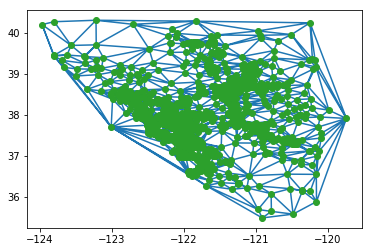

In [8]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [9]:
print(tri.vertices[1])

[204 247 629]


In [10]:
edges = set() 
for n in range(tri.nsimplex): 
    edge = ([tri.vertices[n,0], tri.vertices[n,1]]) 
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
    edge = ([tri.vertices[n,0], tri.vertices[n,2]]) 
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
    edge = ([tri.vertices[n,1], tri.vertices[n,2]])     
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
# print(edges)

In [12]:
import csv
speed_dict = {}
with open('san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    next(csvReader, None)
    for row in csvReader:
        if row[2] == "12":
            keypair = (int(row[0]) - 1, int(row[1]) - 1)
            if keypair in speed_dict:
                speed_dict[keypair].append(float(row[3]))
            speed_dict[keypair] = [float(row[3])]
            keypair = (int(row[1]) - 1, int(row[0]) - 1)
            if keypair in speed_dict:
                speed_dict[keypair].append(float(row[3]))
            speed_dict[keypair] = [float(row[3])]


In [13]:
for key, value in zip(speed_dict.keys(), speed_dict.values()):
    speed_dict[key] = np.mean(value)

In [14]:
traffic_flows = {}
filtered_edges = []
filtered_points = []
for i in range(len(edges)):
    edge = list(edges)[i]
#     start = points[edge[0]]
#     end = points[edge[1]]
    start = node_dict[edge[0]]
    end = node_dict[edge[1]]
    key1 = (edge[0],edge[1])
    if key1 in speed_dict:
        filtered_edges.append(edge)
        filtered_points.append(node_dict[edge[0]])
        filtered_points.append(node_dict[edge[1]])
        road_len = np.sqrt(np.power(end[1] - end[0], 2) + np.power(start[1] - start[0], 2)) * 69.0
        speed = road_len/speed_dict[key1]
#         road_len = np.sqrt(np.power(end[1] - end[0], 2) + np.power(start[1] - start[0], 2)) * 69.0
    #     traffic_flow = 4*(road_len / (0.003 + (60 * 2)/3600.0))
        traffic_flow = speed * (1/(0.003 + (speed * 2)/3600.0))
        traffic_flows[edge] = traffic_flow
        print("For road: ", edge, " the traffic flow is: ", traffic_flow)



('For road: ', (2676, 1930), ' the traffic flow is: ', 1691.0971531677976)
('For road: ', (1617, 1608), ' the traffic flow is: ', 1693.0020440960957)
('For road: ', (2419, 1546), ' the traffic flow is: ', 1636.561828723595)
('For road: ', (1947, 828), ' the traffic flow is: ', 1653.0922062333411)
('For road: ', (2511, 90), ' the traffic flow is: ', 1623.6677200394795)
('For road: ', (95, 1515), ' the traffic flow is: ', 1730.2591632906281)
('For road: ', (231, 2512), ' the traffic flow is: ', 1767.181245027178)
('For road: ', (1387, 1240), ' the traffic flow is: ', 1596.7084476305863)
('For road: ', (1586, 1098), ' the traffic flow is: ', 1339.4111416141229)
('For road: ', (1268, 2361), ' the traffic flow is: ', 1653.3999349145358)
('For road: ', (1932, 1934), ' the traffic flow is: ', 1718.9983101436558)
('For road: ', (1996, 2157), ' the traffic flow is: ', 1616.8138571149282)
('For road: ', (2011, 2387), ' the traffic flow is: ', 1613.796657585907)
('For road: ', (1043, 1637), ' the

('For road: ', (1254, 2677), ' the traffic flow is: ', 1643.1945871821672)
('For road: ', (2514, 1405), ' the traffic flow is: ', 1729.6907868022042)
('For road: ', (594, 1065), ' the traffic flow is: ', 1707.527266969061)
('For road: ', (2653, 2118), ' the traffic flow is: ', 1554.5376782804103)
('For road: ', (25, 2155), ' the traffic flow is: ', 1631.2143259543973)
('For road: ', (723, 2172), ' the traffic flow is: ', 1709.253001964368)
('For road: ', (142, 261), ' the traffic flow is: ', 1595.0287388015799)
('For road: ', (102, 447), ' the traffic flow is: ', 1620.5263992379441)
('For road: ', (2156, 63), ' the traffic flow is: ', 1718.1174639309033)
('For road: ', (919, 1831), ' the traffic flow is: ', 1740.3350930891363)
('For road: ', (280, 619), ' the traffic flow is: ', 1678.6718760297845)
('For road: ', (602, 2226), ' the traffic flow is: ', 1717.6398992293803)
('For road: ', (1332, 2489), ' the traffic flow is: ', 1646.2692192583288)
('For road: ', (770, 146), ' the traffic 

('For road: ', (210, 1290), ' the traffic flow is: ', 1733.8677201429341)
('For road: ', (1601, 331), ' the traffic flow is: ', 1665.536923563317)
('For road: ', (2264, 1181), ' the traffic flow is: ', 1592.7967701865075)
('For road: ', (950, 1487), ' the traffic flow is: ', 1728.4157786507074)
('For road: ', (1471, 1723), ' the traffic flow is: ', 1726.3875601525249)
('For road: ', (413, 1609), ' the traffic flow is: ', 1593.1024520686751)
('For road: ', (2196, 1637), ' the traffic flow is: ', 1681.4034100673259)
('For road: ', (981, 2183), ' the traffic flow is: ', 1674.5519620727653)
('For road: ', (1894, 1285), ' the traffic flow is: ', 1703.7778778276147)
('For road: ', (1057, 1528), ' the traffic flow is: ', 1744.3284211956498)
('For road: ', (228, 1400), ' the traffic flow is: ', 1764.0444313941473)
('For road: ', (1030, 384), ' the traffic flow is: ', 1673.1575107601204)
('For road: ', (80, 1701), ' the traffic flow is: ', 1709.2789666118686)
('For road: ', (364, 2334), ' the t

('For road: ', (1923, 1929), ' the traffic flow is: ', 1661.0333882063223)
('For road: ', (808, 1045), ' the traffic flow is: ', 1755.246330831377)
('For road: ', (332, 467), ' the traffic flow is: ', 1751.2909425550843)
('For road: ', (1258, 533), ' the traffic flow is: ', 1687.5145261383702)
('For road: ', (10, 1627), ' the traffic flow is: ', 1679.7906786047427)
('For road: ', (694, 545), ' the traffic flow is: ', 1626.2098193345132)
('For road: ', (683, 816), ' the traffic flow is: ', 1760.7578069141805)
('For road: ', (1093, 1097), ' the traffic flow is: ', 1704.7090217734578)
('For road: ', (637, 1624), ' the traffic flow is: ', 1576.3039813397913)
('For road: ', (1301, 1180), ' the traffic flow is: ', 1651.206014418678)
('For road: ', (2070, 366), ' the traffic flow is: ', 1616.9798465386143)
('For road: ', (479, 1654), ' the traffic flow is: ', 1650.2348417683259)
('For road: ', (352, 1247), ' the traffic flow is: ', 1676.2027406896918)
('For road: ', (2251, 2671), ' the traffi

('For road: ', (1251, 1949), ' the traffic flow is: ', 1662.4772460376907)
('For road: ', (2338, 2457), ' the traffic flow is: ', 1536.014300773488)
('For road: ', (2058, 2056), ' the traffic flow is: ', 1442.8710044278841)
('For road: ', (1380, 169), ' the traffic flow is: ', 1687.8298468934136)
('For road: ', (2515, 1395), ' the traffic flow is: ', 1638.6803343808126)
('For road: ', (2248, 2454), ' the traffic flow is: ', 1677.7623365573606)
('For road: ', (1608, 474), ' the traffic flow is: ', 1649.7563865981995)
('For road: ', (2326, 1321), ' the traffic flow is: ', 1724.4679323327418)
('For road: ', (334, 1012), ' the traffic flow is: ', 1633.7154403932723)
('For road: ', (619, 1613), ' the traffic flow is: ', 1637.6449062425083)
('For road: ', (2263, 146), ' the traffic flow is: ', 1641.1088905204294)
('For road: ', (1648, 1292), ' the traffic flow is: ', 1708.0152623628762)
('For road: ', (1904, 1905), ' the traffic flow is: ', 1682.2791772999819)
('For road: ', (1945, 976), ' t

('For road: ', (100, 1050), ' the traffic flow is: ', 1698.2263090037775)
('For road: ', (1870, 1871), ' the traffic flow is: ', 1669.5586088056662)
('For road: ', (975, 465), ' the traffic flow is: ', 1683.5690216161524)
('For road: ', (1200, 1201), ' the traffic flow is: ', 1454.6887649103005)
('For road: ', (962, 1244), ' the traffic flow is: ', 1746.5142903623687)
('For road: ', (1087, 1520), ' the traffic flow is: ', 1719.3562156474475)
('For road: ', (1553, 216), ' the traffic flow is: ', 1696.4829836962901)
('For road: ', (1276, 1275), ' the traffic flow is: ', 1723.1847176116291)
('For road: ', (1535, 286), ' the traffic flow is: ', 1730.7002277634308)
('For road: ', (1302, 2361), ' the traffic flow is: ', 1505.3999552596524)
('For road: ', (1300, 2466), ' the traffic flow is: ', 1769.7550883869817)
('For road: ', (2231, 1431), ' the traffic flow is: ', 1472.4265802405346)
('For road: ', (755, 921), ' the traffic flow is: ', 1670.4330322284241)
('For road: ', (1981, 2541), ' th

('For road: ', (1436, 675), ' the traffic flow is: ', 1704.2484401951597)
('For road: ', (1154, 2112), ' the traffic flow is: ', 1609.0837317386215)
('For road: ', (1514, 1070), ' the traffic flow is: ', 1644.2037447483658)
('For road: ', (1689, 641), ' the traffic flow is: ', 1683.4217439183617)
('For road: ', (2256, 13), ' the traffic flow is: ', 1692.0121101289117)
('For road: ', (75, 755), ' the traffic flow is: ', 1663.8639004454449)
('For road: ', (1117, 2119), ' the traffic flow is: ', 1478.2784732331731)
('For road: ', (484, 1609), ' the traffic flow is: ', 1581.954618519341)
('For road: ', (820, 1855), ' the traffic flow is: ', 1641.2445445240664)
('For road: ', (1727, 1722), ' the traffic flow is: ', 1712.5454499109831)
('For road: ', (1014, 637), ' the traffic flow is: ', 1742.2153252373039)
('For road: ', (68, 159), ' the traffic flow is: ', 1584.812475458996)
('For road: ', (807, 862), ' the traffic flow is: ', 1726.4404662323732)
('For road: ', (1744, 1458), ' the traffic

('For road: ', (1769, 659), ' the traffic flow is: ', 1671.9257472393899)
('For road: ', (86, 561), ' the traffic flow is: ', 1659.0442087873346)
('For road: ', (2655, 1936), ' the traffic flow is: ', 1715.0779035536336)
('For road: ', (2022, 2206), ' the traffic flow is: ', 1641.0989412325837)
('For road: ', (723, 1932), ' the traffic flow is: ', 1658.8168075698063)
('For road: ', (1552, 58), ' the traffic flow is: ', 1734.5946658396026)
('For road: ', (338, 1726), ' the traffic flow is: ', 1678.9403010291862)
('For road: ', (324, 381), ' the traffic flow is: ', 1732.0819664830794)
('For road: ', (926, 86), ' the traffic flow is: ', 1743.259728102403)
('For road: ', (322, 1558), ' the traffic flow is: ', 1745.6966290062412)
('For road: ', (1288, 1287), ' the traffic flow is: ', 1634.1696731402494)
('For road: ', (400, 1204), ' the traffic flow is: ', 1656.2912670313581)
('For road: ', (2552, 2113), ' the traffic flow is: ', 1568.1687451539838)
('For road: ', (1243, 532), ' the traffic

('For road: ', (1458, 2581), ' the traffic flow is: ', 1537.6554077433334)
('For road: ', (754, 74), ' the traffic flow is: ', 1695.6831601561385)
('For road: ', (1890, 1867), ' the traffic flow is: ', 1728.5145898731569)
('For road: ', (2388, 751), ' the traffic flow is: ', 1692.1099643862249)
('For road: ', (2015, 1601), ' the traffic flow is: ', 1356.7310680523176)
('For road: ', (2338, 1744), ' the traffic flow is: ', 1712.9255091006223)
('For road: ', (187, 1145), ' the traffic flow is: ', 1677.2910539083066)
('For road: ', (63, 1562), ' the traffic flow is: ', 1646.1096451336039)
('For road: ', (2062, 2067), ' the traffic flow is: ', 1591.4500347370179)
('For road: ', (1634, 1027), ' the traffic flow is: ', 1663.0915827423685)
('For road: ', (2201, 1633), ' the traffic flow is: ', 1712.4062019657742)
('For road: ', (1876, 1384), ' the traffic flow is: ', 1416.0467306875551)
('For road: ', (293, 2429), ' the traffic flow is: ', 1630.0872808739102)
('For road: ', (2464, 1729), ' th

('For road: ', (2345, 2224), ' the traffic flow is: ', 1703.0580887395522)
('For road: ', (1448, 233), ' the traffic flow is: ', 1625.170735790492)
('For road: ', (1753, 2638), ' the traffic flow is: ', 1710.5449639539111)
('For road: ', (345, 829), ' the traffic flow is: ', 1721.8647424459407)
('For road: ', (346, 1850), ' the traffic flow is: ', 1734.5553635906317)
('For road: ', (525, 2466), ' the traffic flow is: ', 1720.206316116733)
('For road: ', (2120, 1119), ' the traffic flow is: ', 1659.1765677625622)
('For road: ', (1438, 1803), ' the traffic flow is: ', 1653.2825363414076)
('For road: ', (1601, 2539), ' the traffic flow is: ', 1697.7962222335111)
('For road: ', (914, 2699), ' the traffic flow is: ', 1585.4517228609523)
('For road: ', (350, 1261), ' the traffic flow is: ', 1729.8348715088457)
('For road: ', (2447, 1753), ' the traffic flow is: ', 1466.5402182813862)
('For road: ', (2675, 976), ' the traffic flow is: ', 1617.5339707334415)
('For road: ', (808, 1525), ' the t

In [15]:
import networkx as nx 
graph1 = nx.Graph(list(edges)) 
graph2 = nx.Graph(list(filtered_edges)) 
# print(graph.edges()) 

# largest_g1 = max(nx.connected_component_subgraphs(graph1), key=len)
# graphs_1 = list(nx.connected_component_subgraphs(graph1))
# print(len(graphs_1))
# graphs_2 = list(nx.connected_component_subgraphs(graph2))
# print(len(graphs_2))
largest_g2 = max(nx.connected_component_subgraphs(graph2), key=len)

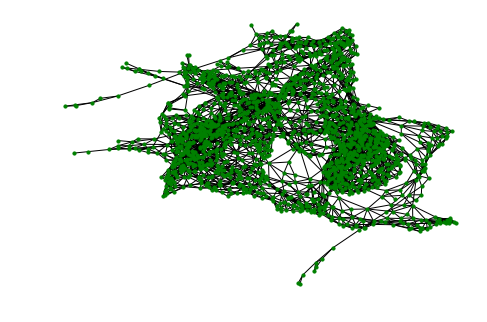

In [16]:
import matplotlib.pyplot as plt 
# pointIDXY = dict(zip(range(len(points)), points)) 
# pointIDXY = dict(zip(range(len(largest_g1.nodes)), largest_g1.nodes))
# nx.draw(graph1,node_size = 10, node_color = "blue") 
# plt.show() 

# pointIDXY = dict(zip(range(len(filtered_points)), filtered_points)) 
nx.draw(largest_g2,node_size = 10, node_color = "green") 
plt.show()

In [17]:
nx.set_edge_attributes(largest_g2, traffic_flows, 'capacity')

In [18]:
print(len(edges))

10810


In [19]:
for (u,v) in largest_g2.edges:
    print(u,v)
    print(largest_g2[u][v])
    if v!=643: break

(1, 1732)
{'capacity': 1604.7323274807727}


#### Q13 Calculate the Max Flow & Calculate the Number of Edge-Disjoint Paths


In [20]:
stanford_id = 2606
UCSC_id = 1967
print(nx.maximum_flow_value(largest_g2, stanford_id, UCSC_id))

from networkx.algorithms.connectivity.disjoint_paths import edge_disjoint_paths
print(len(list(edge_disjoint_paths(largest_g2, stanford_id, UCSC_id))))

8108.9785486
5


#### Q14 Defoliate the Graph

In [ ]:
threshold = 20
ebunch = []
for (u,v) in largest_g2.edges():
    if largest_g2[u][v]['weight'] < threshold:
        ebunch.append((u,v))
        
largest_g2.remove_edges_from(ebunch)
# largest_g2.__dict__
# plot on real map coordinates and check bridges location

#### Q15: triangle inequality